In [3]:
import pandas as pd

path = r"UHT milk P036.csv"
 
df = pd.read_csv(path)
df


,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By
0,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMF...,Y,76.82,6358.2485,56,-1.7,1272.6473,...,20,6,5,3,6,129,184,NaN,NaN,PEAKS DB
1,3,10,P02666,R.DMPIQAFLLYQEPVLGPVRGPFPIIV,Y,75.16,2908.5923,26,-2.9,1455.2933,...,12,3,4,2,3,199,224,NaN,NaN,PEAKS DB
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,8,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB
3,3,10,P02666,S.QSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLS...,Y,70.17,5308.7778,47,-1.4,1328.1945,...,5,2,1,1,1,138,184,NaN,NaN,PEAKS DB
4,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLP.L,Y,69.89,2838.4326,25,-2.1,1420.2148,...,12,4,2,2,4,129,153,NaN,NaN,PEAKS DB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,1,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,1,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB


Text(0, 0.5, 'Frequency')

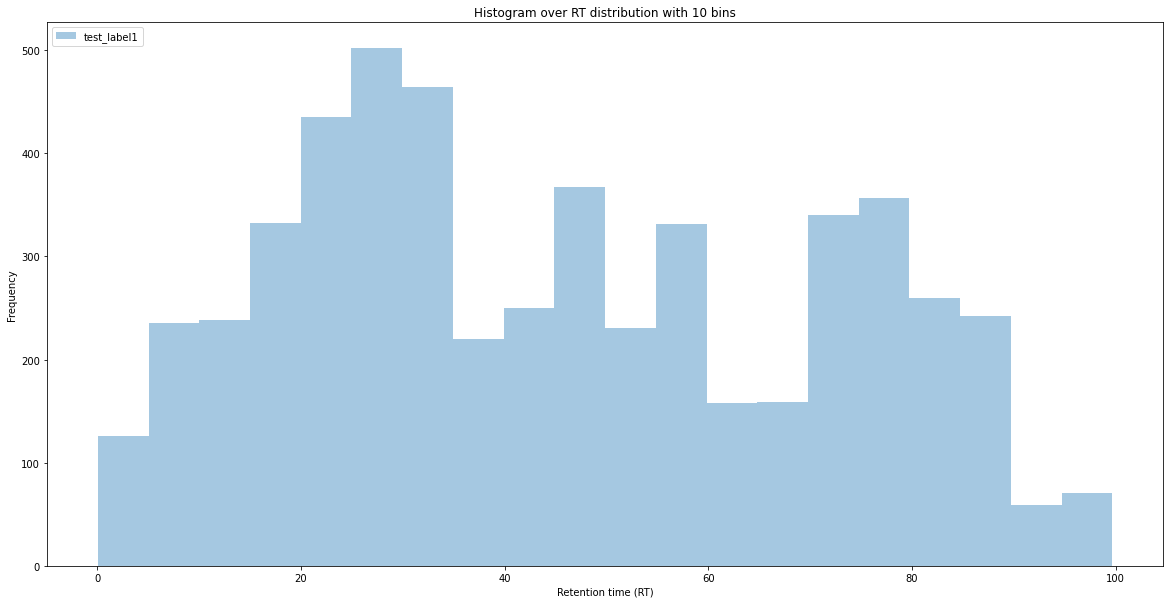

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(20,10))
#sns.distplot(df['RT'], kde=False, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0})
sns.distplot(df['RT'], kde=False)
(n, bins) = np.histogram(df['RT'])
plt.title(f"Histogram over RT distribution with {len(n)} bins")
plt.legend(loc="upper left", labels=['test_label1','test_label2'])
plt.xlabel('Retention time (RT)')
plt.ylabel('Frequency')

# plt.ylabel('RT')
# ls_RT = df['RT'].to_numpy()
# plt.plot(ls_RT)
# plt.show()

#sns.lmplot(x=ls_RT)

#sns.lmplot(y="#Feature", x='Mass', data=df[:2000])

KeyboardInterrupt: 

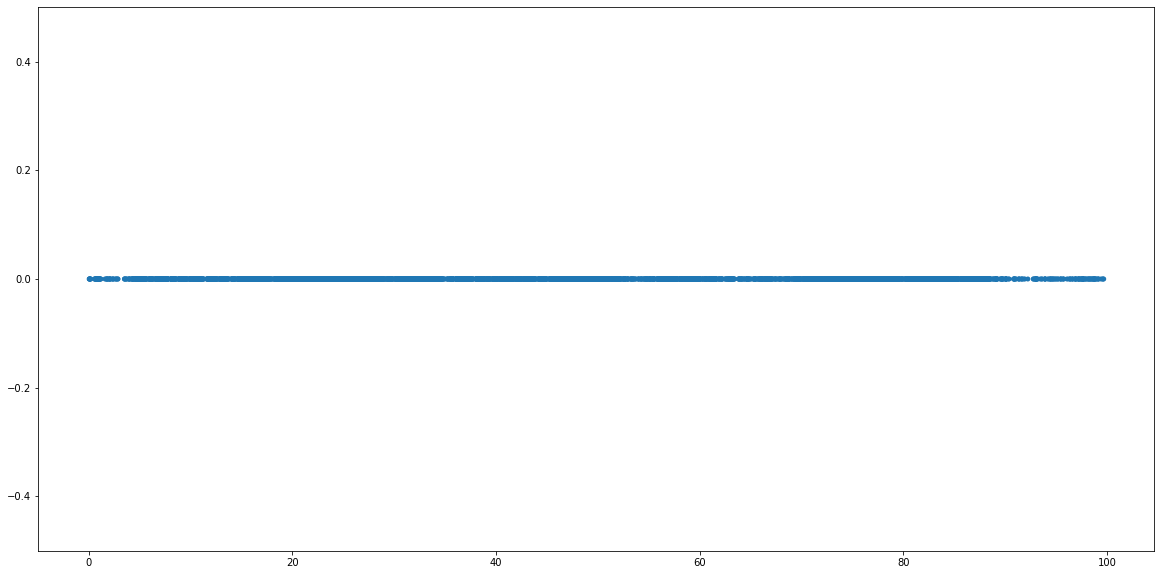

In [67]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)


In [23]:
import numpy as np
def count_no_of_modifications(ptm_str):
    #check if NaN value
    if pd.isnull(ptm_str):
        return 0
    #if isinstance(ptm_str, str):
    return 1 + ptm_str.count(';')

#apply count_no_of_modifications to each PTM column
df['#modifications'] = df['PTM'].apply(count_no_of_modifications)

#print non zero values in modifcations column
df[df['#modifications'] > 0]


,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By,#modifications
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB,1
5,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQ(+.98)S(-18.01)W...,Y,69.56,6357.2168,56,8.7,1272.4542,...,2,0,1,1,129,184,Deamidation (NQ); lal; Oxidation (M),Q28:Deamidation (NQ):10.19;S29:lal:71.89;M31:O...,PEAKS DB,3
8,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWM(+15.99)HQPHQ...,Y,65.11,6374.2437,56,2.4,1275.8551,...,2,3,0,1,129,184,Oxidation (M),M31:Oxidation (M):111.64,PEAKS DB,1
9,3,10,P02666,A.RELEELNVPGEIVESLS(+79.97)S(+79.97)S(+79.97)E...,Y,64.46,3041.2920,25,-2.1,1521.6434,...,2,2,3,1,16,40,Phosphorylation (STY),S17:Phosphorylation (STY):30.83;S18:Phosphoryl...,PEAKS DB,1
11,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQ(+.98)PHQPL...,Y,63.57,6359.2324,56,0.2,1272.8501,...,0,0,1,0,129,184,Deamidation (NQ),Q33:Deamidation (NQ):10.19,PEAKS DB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB,1
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB,1
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB,1
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB,1


<AxesSubplot:xlabel='RT'>

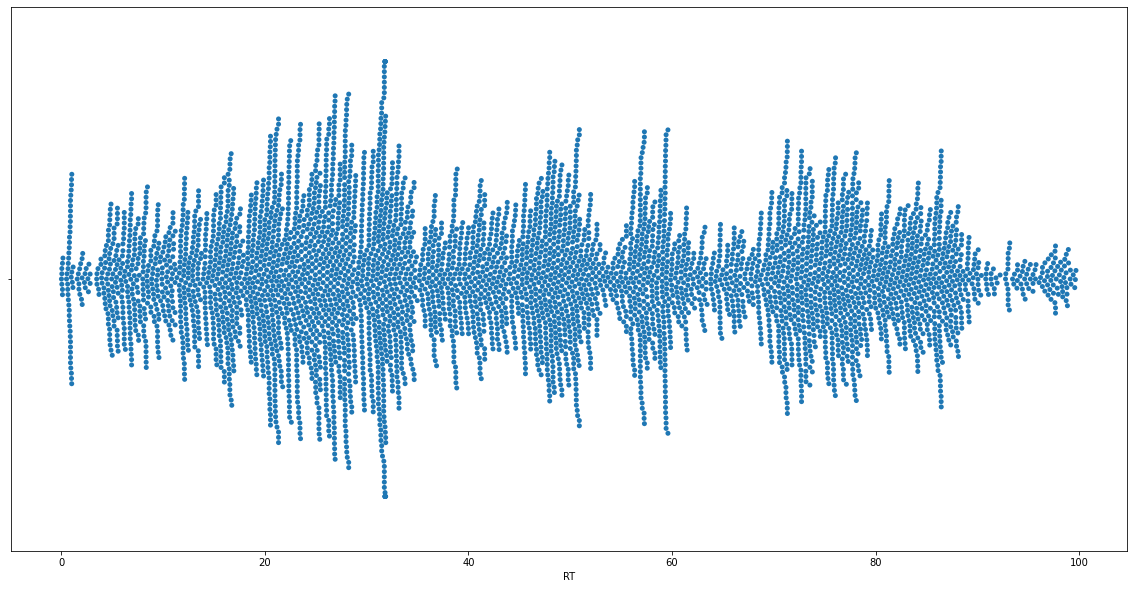

In [12]:
# Count Plot (a.k.a. Bar Plot) #BEFORE adding modifications
plt.figure(figsize=(20,10))
sns.swarmplot(x='RT', data=df)

<AxesSubplot:>

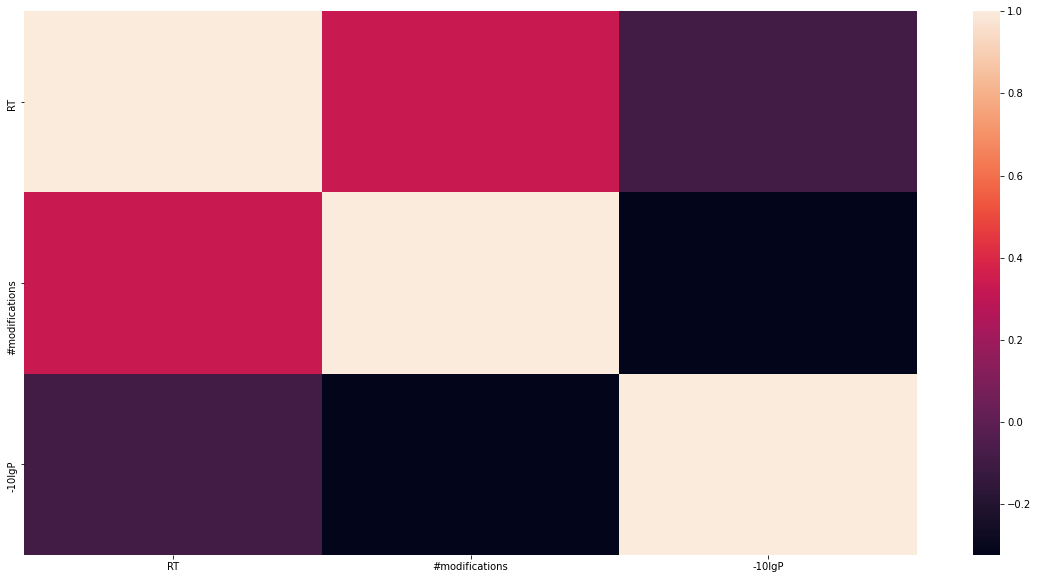

In [35]:
df_modific = df[df['#modifications'] > 0]

plt.figure(figsize=(20,10))
sns.heatmap(df[['RT','#modifications','-10lgP']].corr())

<AxesSubplot:xlabel='RT', ylabel='-10lgP'>

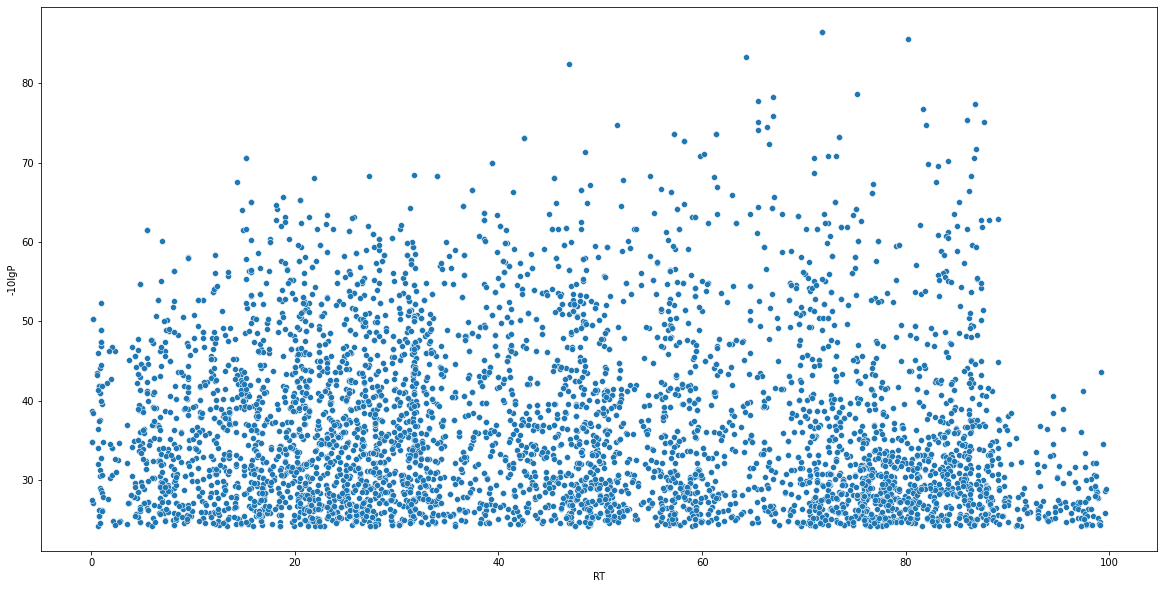

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(y="-10lgP", x="RT", data=df)

Text(0, 0.5, 'Count')

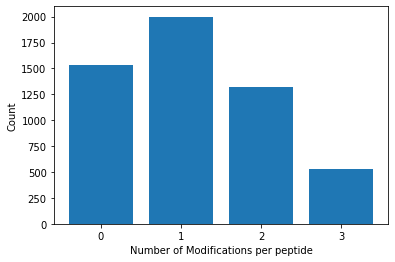

In [52]:

#Column chart (a.k.a. Bar Chart) showing distribution of modifications per peptide
plt.bar(df['#modifications'].value_counts().index, df['#modifications'].value_counts())
plt.xticks(np.arange(0,4))
plt.xlabel('Number of Modifications per peptide')
plt.ylabel('Count')

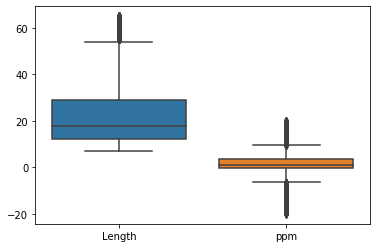

In [ ]:
df_len = df[ ["Length", "ppm"]]
sns.boxplot(data=df_len)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


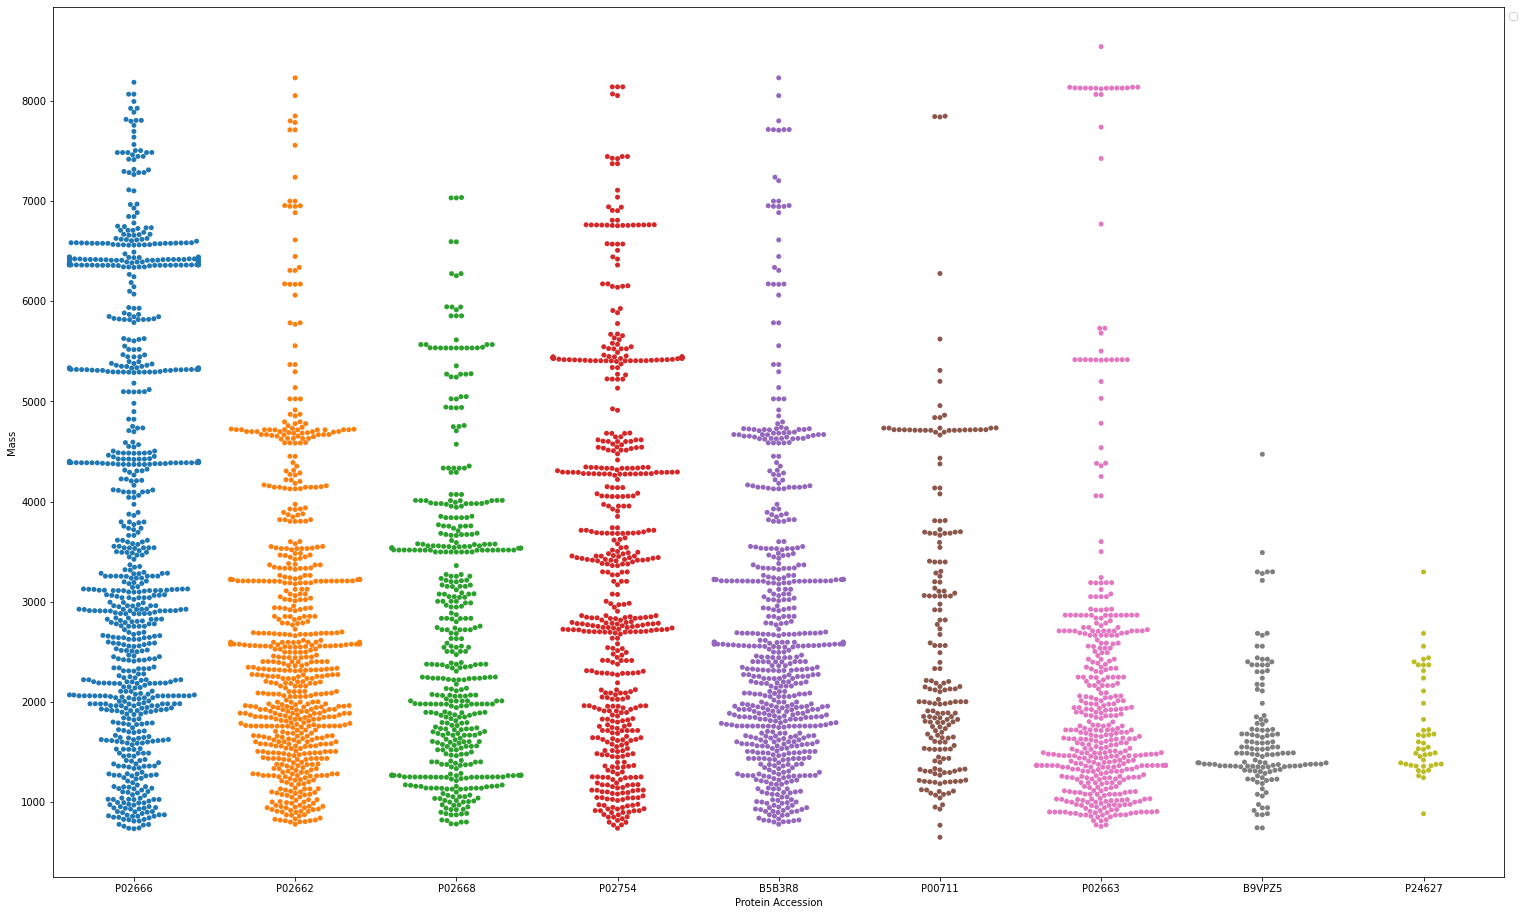

In [ ]:
df_melt = [["Protein Accession", "Mass"]]
df2 = df[:4000]
plt.figure(figsize=(26,16))
sns.swarmplot(x='Protein Accession', y='Mass', data=df2 )
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points 

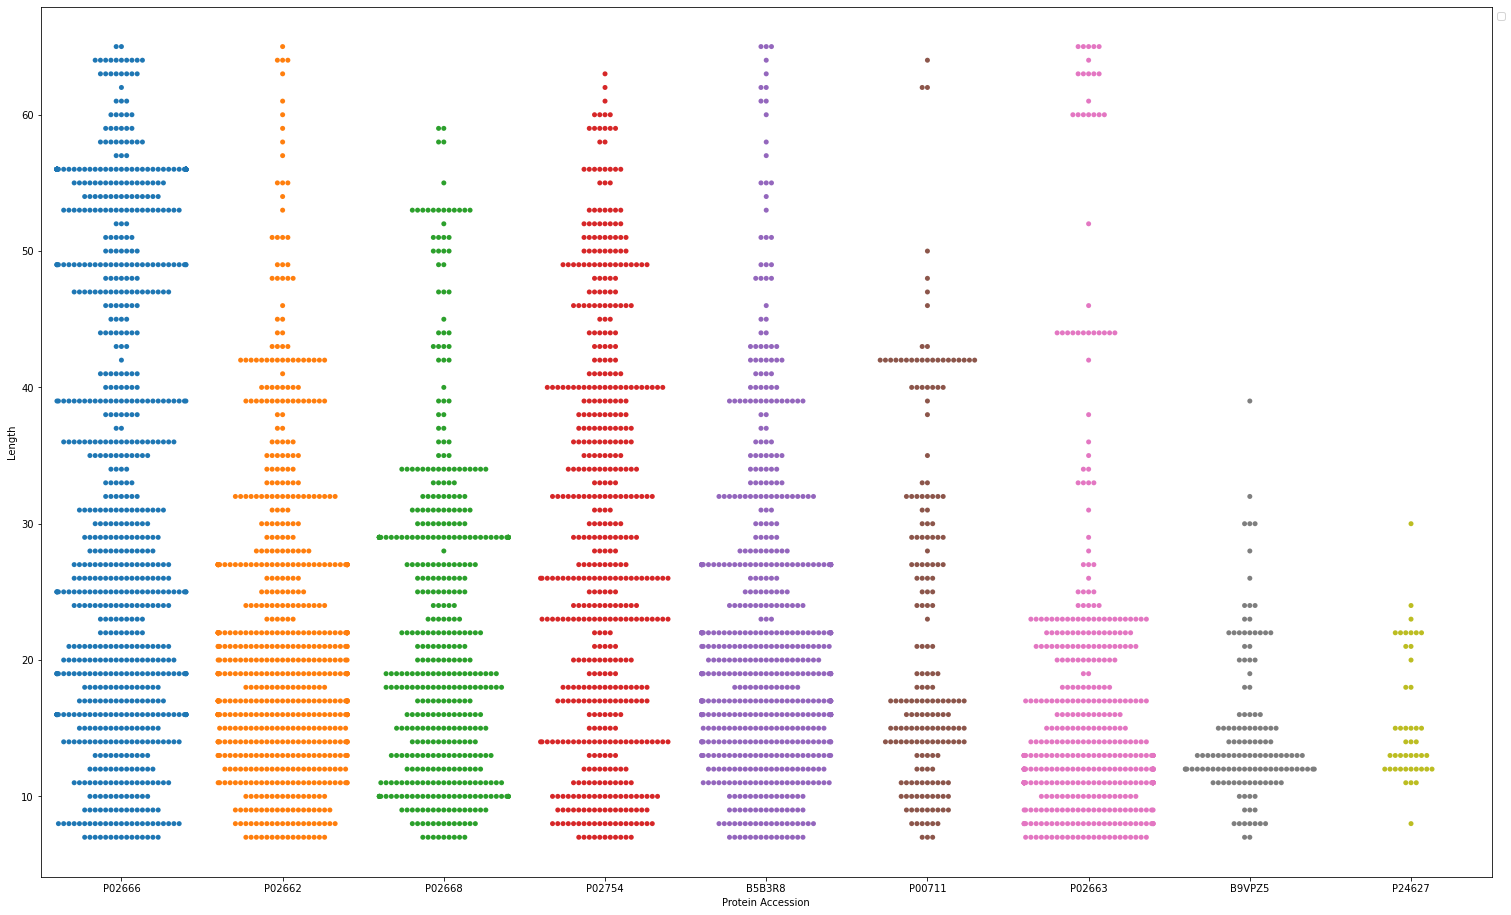

In [ ]:
df_melt = [["Protein Accession", "Mass"]]
df2 = df[:4000]
plt.figure(figsize=(26,16))
sns.swarmplot(x='Protein Accession', y='Length', data=df2 )
# Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:xlabel='Protein Accession', ylabel='Length'>

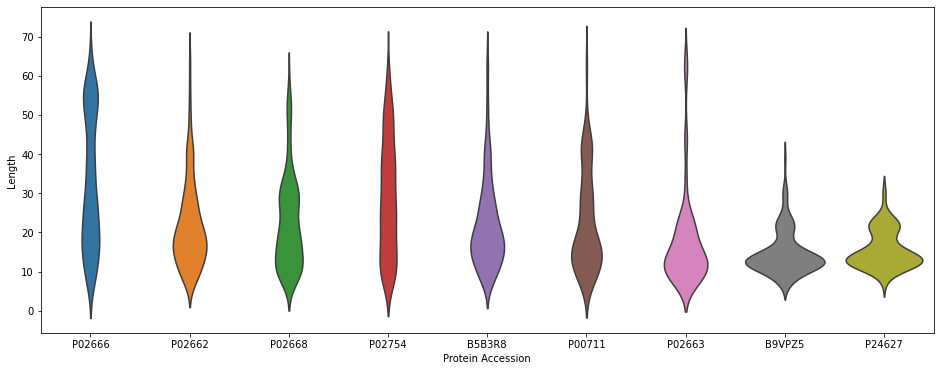

In [ ]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Protein Accession', y='Length', data=df2,
               inner=None) # Remove the bars inside the violins)

<AxesSubplot:>

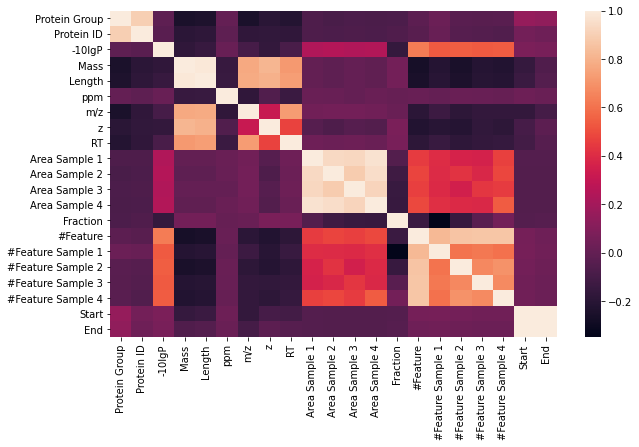

In [ ]:
# Calculate correlations
plt.figure(figsize=(10,6))
df_cor = df.drop("")
corr = df.corr()
# Heatmap
sns.heatmap(corr)

In [ ]:
!pip install nodejs

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install lux-api
#Activating extension for Jupyter notebook
!jupyter nbextension install --py luxwidget
!jupyter nbextension enable --py luxwidget
# Activating extension for Jupyter lab
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter labextension install luxwidget

Installing C:\Users\chris\anaconda3\lib\site-packages\luxwidget\nbextension/static -> luxwidget
Up to date: C:\ProgramData\jupyter\nbextensions\luxwidget\extension.js
Up to date: C:\ProgramData\jupyter\nbextensions\luxwidget\index.js
Up to date: C:\ProgramData\jupyter\nbextensions\luxwidget\index.js.map
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable luxwidget --py
    
Enabling notebook extension luxwidget/extension...
      - Validating: ok


An error occured.
ValueError: "@jupyter-widgets/jupyterlab-manager" is not a valid extension:
schemaDir is empty: "./schema"
See the log file for details:  C:\Users\chris\AppData\Local\Temp\jupyterlab-debug-vmfh9zfi.log
An error occured.
ValueError: No version of luxwidget could be found that is compatible with the current version of JupyterLab. However, it seems to support a new version of JupyterLab. Consider upgrading JupyterLab.

Conflicting Dependencies:
JupyterLabExtension        Package
>=16.8.4 <16.9.0>=17.0.1 <18.0.0 react
>=16.8.4 <16.9.0>=17.0.1 <18.0.0 react-dom
See the log file for details:  C:\Users\chris\AppData\Local\Temp\jupyterlab-debug-uomhyc2c.log


In [ ]:
import pandas as pd
import lux
path = r"C:\Users\chris\Documents\7. Semester\Data Visualization\UHT milk P036.csv"
df = pd.read_csv(path)
df

,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By
0,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMF...,Y,76.82,6358.2485,56,-1.7,1272.6473,...,20,6,5,3,6,129,184,NaN,NaN,PEAKS DB
1,3,10,P02666,R.DMPIQAFLLYQEPVLGPVRGPFPIIV,Y,75.16,2908.5923,26,-2.9,1455.2933,...,12,3,4,2,3,199,224,NaN,NaN,PEAKS DB
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,8,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB
3,3,10,P02666,S.QSLTLTDVENLHLPLPLLQSWMHQPHQPLPPTVMFPPQSVLSLS...,Y,70.17,5308.7778,47,-1.4,1328.1945,...,5,2,1,1,1,138,184,NaN,NaN,PEAKS DB
4,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLP.L,Y,69.89,2838.4326,25,-2.1,1420.2148,...,12,4,2,2,4,129,153,NaN,NaN,PEAKS DB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,1,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,1,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB


In [ ]:
!jupyter nbextension list 

Known nbextensions:
  config dir: C:\Users\chris\.jupyter\nbconfig
    notebook section
      luxwidget/extension enabled 
  config dir: C:\Users\chris\anaconda3\etc\jupyter\nbconfig
    notebook section
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok


<AxesSubplot:xlabel='m/z', ylabel='count'>

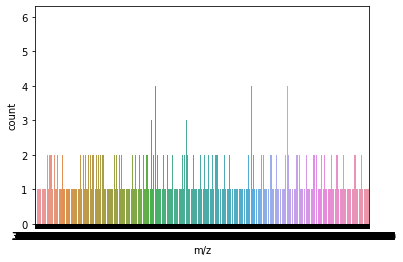

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.countplot(x='m/z', data=df)